# Module 6 EDA Project - Coffee Quality Database

In [1]:
import logging
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Set display options to show all rows and columns without truncation
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)  # Adjust width to avoid truncation

In [2]:
# Load the datasets
arabica_data_raw = pd.read_csv('data/arabica_ratings_raw.csv')
robusta_data_raw = pd.read_csv('data/robusta_ratings_raw.csv')

In [3]:
arabica_data_raw.head(1)

,Unnamed: 0,quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Species,Owner,Country of Origin,...,Quakers,Color,Category Two Defects,NA.3,Expiration,Certification Body,Certification Address,Certification Contact,Unnamed: 51,Notes
0,0,90.58,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,...,0.0,Green,0 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN


In [4]:
# Drop columns where all values are NaN
arabica_data_drop_nan = arabica_data_raw.dropna(axis=1, how='all')
robusta_data_drop_nan = robusta_data_raw.dropna(axis=1, how='all')
arabica_data_drop_nan.head(3)
robusta_data_drop_nan.head(3)

,Unnamed: 0,quality_score,Species,Owner,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,...,Total Cup Points,Moisture,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,83.75,Robusta,Ankole coffee producers coop,Uganda,Kyangundu cooperative society,NaN,Ankole coffee producers,0,Ankole Coffee Producers Coop,...,Sample 83.75,12 %,0 full defects,0,Green,2 full defects,"June 26th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073
1,0,83.50,Robusta,Nishant Gurjer,India,Sethuraman Estate Kaapi Royale,25,Sethuraman Estate,14/1148/2017/21,Kaapi Royale,...,Sample 83.50,0 %,0 full defects,0,NaN,2 full defects,"October 31st, 2018",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100
2,0,83.25,Robusta,Andrew Hetzel,India,Sethuraman Estate,NaN,NaN,0000,Sethuraman Estate,...,Sample 83.25,0 %,0 full defects,0,Green,0 full defects,"April 29th, 2016",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100


In [5]:
# Display the arabica_data_cleaned column headers
arabica_data_drop_nan.columns.tolist()

['Unnamed: 0',
 'quality_score',
 'Species',
 'Owner',
 'Country of Origin',
 'Farm Name',
 'Lot Number',
 'Mill',
 'ICO Number',
 'Company',
 'Altitude',
 'Region',
 'Producer',
 'Number of Bags',
 'Bag Weight',
 'In-Country Partner',
 'Harvest Year',
 'Grading Date',
 'Owner.1',
 'Variety',
 'Status',
 'Processing Method',
 'NA',
 'Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'NA.1',
 'Uniformity',
 'Clean Cup',
 'Sweetness',
 'Cupper Points',
 'Total Cup Points',
 'Moisture',
 'Category One Defects',
 'Quakers',
 'Color',
 'Category Two Defects',
 'Expiration',
 'Certification Body',
 'Certification Address',
 'Certification Contact',
 'Notes']

In [6]:
# Display the robusta_data_cleaned column headers
robusta_data_drop_nan.columns.tolist()

['Unnamed: 0',
 'quality_score',
 'Species',
 'Owner',
 'Country of Origin',
 'Farm Name',
 'Lot Number',
 'Mill',
 'ICO Number',
 'Company',
 'Altitude',
 'Region',
 'Producer',
 'Number of Bags',
 'Bag Weight',
 'In-Country Partner',
 'Harvest Year',
 'Grading Date',
 'Owner.1',
 'Variety',
 'Status',
 'Processing Method',
 'NA',
 'Fragrance / Aroma',
 'Flavor',
 'Aftertaste',
 'Salt / Acid',
 'Bitter / Sweet',
 'Mouthfeel',
 'NA.1',
 'Uniform Cup',
 'Clean Cup',
 'Balance',
 'Cupper Points',
 'Total Cup Points',
 'Moisture',
 'Category One Defects',
 'Quakers',
 'Color',
 'Category Two Defects',
 'Expiration',
 'Certification Body',
 'Certification Address',
 'Certification Contact']

In [7]:
# Create a dictionary mapping the robusta column names to the arabica column names
robusta_column_mapping = {
    'Fragrance / Aroma': 'Aroma',
    'Salt / Acid': 'Acidity',  # Rename Salt / Acid to Acidity
    'Uniform Cup': 'Uniformity',
    'Bitter / Sweet': 'Sweetness'
}

# Rename the columns and add the 'Body' column in one step
robusta_data_drop_nan = (robusta_data_drop_nan
                         .rename(columns=robusta_column_mapping)
                         .assign(Body=np.nan))

robusta_data_drop_nan

,Unnamed: 0,quality_score,Species,Owner,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,...,Moisture,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact,Body
0,0,83.75,Robusta,Ankole coffee producers coop,Uganda,Kyangundu cooperative society,NaN,Ankole coffee producers,0,Ankole Coffee Producers Coop,...,12 %,0 full defects,0,Green,2 full defects,"June 26th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073,NaN
1,0,83.50,Robusta,Nishant Gurjer,India,Sethuraman Estate Kaapi Royale,25,Sethuraman Estate,14/1148/2017/21,Kaapi Royale,...,0 %,0 full defects,0,NaN,2 full defects,"October 31st, 2018",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN
2,0,83.25,Robusta,Andrew Hetzel,India,Sethuraman Estate,NaN,NaN,0000,Sethuraman Estate,...,0 %,0 full defects,0,Green,0 full defects,"April 29th, 2016",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN
3,0,83.00,Robusta,UGACOF,Uganda,UGACOF project area,NaN,UGACOF,0,UGACOF Ltd,...,12 %,0 full defects,0,Green,7 full defects,"July 14th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073,NaN
4,0,83.00,Robusta,Katuka Development Trust Ltd,Uganda,Katikamu capca farmers association,NaN,Katuka Development Trust,0,Katuka Development Trust Ltd,...,12 %,0 full defects,0,Green,3 full defects,"June 26th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073,NaN
5,0,82.75,Robusta,Andrew Hetzel,India,NaN,NaN,(self),NaN,"Cafemakers, LLC",...,0 %,0 full defects,0,Green,0 full defects,"February 28th, 2013",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN
6,0,82.58,Robusta,Andrew Hetzel,India,Sethuraman Estates,NaN,NaN,NaN,CafeMakers,...,0 %,0 full defects,0,Green,0 full defects,"May 15th, 2015",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN
7,0,82.50,Robusta,Nishant Gurjer,India,Sethuraman Estate Kaapi Royale,7,Sethuraman Estate,14/1148/2017/18,Kaapi Royale,...,10 %,0 full defects,0,Bluish-Green,0 full defects,"October 25th, 2018",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN
8,0,82.50,Robusta,Nishant Gurjer,India,Sethuraman Estate,RKR,Sethuraman Estate,14/1148/2016/17,Kaapi Royale,...,9 %,0 full defects,0,Green,0 full defects,"August 17th, 2017",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN
9,0,82.42,Robusta,UGACOF,Uganda,Ishaka,NaN,Nsubuga Umar,0,UGACOF Ltd,...,12 %,0 full defects,0,Green,6 full defects,"August 5th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073,NaN


In [8]:
# Specify which columns to keep in cleaned DataFrame
columns_to_keep = [
 'quality_score',
 'Species',
 'Owner',
 'Country of Origin',
 'Farm Name',
 'Lot Number',
 'Mill',
 'Company',
 'Altitude',
 'Region',
 'Producer',
 'Number of Bags',
 'Bag Weight',
 'In-Country Partner',
 'Harvest Year',
 'Grading Date',
 'Owner.1',
 'Variety',
 'Processing Method',
 'Aroma',
 'Flavor',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Uniformity',
 'Clean Cup',
 'Sweetness',
 'Cupper Points',
 'Total Cup Points',
 'Moisture',
 'Category One Defects',
 'Quakers',
 'Color',
 'Category Two Defects',
 'Expiration',
 'Certification Body'
]

In [9]:
# Select the columns from both DataFrames
arabica_selected = arabica_data_drop_nan[columns_to_keep]
robusta_selected = robusta_data_drop_nan[columns_to_keep]

# Concatenate the DataFrames
combined_coffee_data = pd.concat([arabica_selected, robusta_selected], axis=0, ignore_index=True)
combined_coffee_data.head(5)

,quality_score,Species,Owner,Country of Origin,Farm Name,Lot Number,Mill,Company,Altitude,Region,...,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body
0,90.58,Arabica,metad plc,Ethiopia,METAD PLC,NaN,METAD PLC,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/GOYO,...,10.0,8.75,Sample 90.58,12 %,0 full defects,0.0,Green,0 full defects,"April 3rd, 2016",METAD Agricultural Development plc
1,89.92,Arabica,metad plc,Ethiopia,METAD PLC,NaN,METAD PLC,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/ALAKA,...,10.0,8.58,Sample 89.92,12 %,0 full defects,0.0,Green,1 full defects,"April 3rd, 2016",METAD Agricultural Development plc
2,89.75,Arabica,Grounds for Health Admin,Guatemala,"San Marcos Barrancas ""San Cristobal Cuch",NaN,NaN,NaN,1600 - 1800 m,NaN,...,10.0,9.25,Sample 89.75,0 %,0 full defects,0.0,NaN,0 full defects,"May 31st, 2011",Specialty Coffee Association
3,89.00,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Dabessa Coffee Plantation,NaN,Wolensu,Yidnekachew Debessa Coffee Plantation,1800-2200,Oromia,...,10.0,8.67,Sample 89.00,11 %,0 full defects,0.0,Green,2 full defects,"March 25th, 2016",METAD Agricultural Development plc
4,88.83,Arabica,metad plc,Ethiopia,METAD PLC,NaN,METAD PLC,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/BISHAN FUGU,...,10.0,8.58,Sample 88.83,12 %,0 full defects,0.0,Green,2 full defects,"April 3rd, 2016",METAD Agricultural Development plc


In [10]:
# Query the combined_coffee_data dataframe to show only the Robusta species rows
combined_coffee_data.query('Species == "Robusta"').head()

,quality_score,Species,Owner,Country of Origin,Farm Name,Lot Number,Mill,Company,Altitude,Region,...,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body
1312,83.75,Robusta,Ankole coffee producers coop,Uganda,Kyangundu cooperative society,NaN,Ankole coffee producers,Ankole Coffee Producers Coop,1488,Sheema South Western,...,8.00,8.00,Sample 83.75,12 %,0 full defects,0.0,Green,2 full defects,"June 26th, 2015",Uganda Coffee Development Authority
1313,83.50,Robusta,Nishant Gurjer,India,Sethuraman Estate Kaapi Royale,25,Sethuraman Estate,Kaapi Royale,3170,Chikmagalur Karnataka Indua,...,8.00,8.00,Sample 83.50,0 %,0 full defects,0.0,NaN,2 full defects,"October 31st, 2018",Specialty Coffee Association
1314,83.25,Robusta,Andrew Hetzel,India,Sethuraman Estate,NaN,NaN,Sethuraman Estate,1000m,Chikmagalur,...,7.83,8.00,Sample 83.25,0 %,0 full defects,0.0,Green,0 full defects,"April 29th, 2016",Specialty Coffee Association
1315,83.00,Robusta,UGACOF,Uganda,UGACOF project area,NaN,UGACOF,UGACOF Ltd,1212,Central,...,7.75,8.08,Sample 83.00,12 %,0 full defects,0.0,Green,7 full defects,"July 14th, 2015",Uganda Coffee Development Authority
1316,83.00,Robusta,Katuka Development Trust Ltd,Uganda,Katikamu capca farmers association,NaN,Katuka Development Trust,Katuka Development Trust Ltd,1200-1300,Luwero central region,...,7.58,7.67,Sample 83.00,12 %,0 full defects,0.0,Green,3 full defects,"June 26th, 2015",Uganda Coffee Development Authority


## Note:
While cleaning the column headers, I noticed there was a difference between the arabica and robusta columns. 
The arabica scores were:
Aroma	Flavor	Aftertaste	Acidity	Body	Balance		Uniformity	Clean Cup	Sweetness	Cupper Points

and the Robusta scores were:
Fragrance / Aroma	Flavor	Aftertaste	Salt / Acid	Bitter / Sweet	Mouthfeel	Uniform Cup	Clean Cup	Balance	Cupper Points

So I made the decision to rename some of the Robusta scores columns

In [11]:
# Specify the desired column order in a list
desired_order = [

    # Coffee Details
    'Species', 'Variety','Country of Origin', 'Region', 'Altitude', 'Processing Method', 'Harvest Year',
    
    # General Information
    'Farm Name', 'Lot Number',
    'Number of Bags', 'Producer', 'Mill',
    'Owner', 'Company', 'In-Country Partner',

    # Defects and Quality
    'Moisture', 'Category One Defects', 'Category Two Defects', 
    'Quakers', 'Color',

    # Cupping Scores
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 
    'Uniformity', 'Clean Cup', 'Sweetness', 'Cupper Points', 'Total Cup Points',
    'Grading Date', 'Certification Body'
]

# Reorder the DataFrame columns
combined_coffee_data_reordered = combined_coffee_data[desired_order]

# Set pandas to display all columns
pd.set_option('display.max_columns', None)  # Set to None to show all columns

# Display the reordered DataFrame
combined_coffee_data_reordered

,Species,Variety,Country of Origin,Region,Altitude,Processing Method,Harvest Year,Farm Name,Lot Number,Number of Bags,Producer,Mill,Owner,Company,In-Country Partner,Moisture,Category One Defects,Category Two Defects,Quakers,Color,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Grading Date,Certification Body
0,Arabica,NaN,Ethiopia,GUJI-HAMBELA/GOYO,1950-2200,Washed / Wet,2014,METAD PLC,NaN,300,METAD PLC,METAD PLC,metad plc,METAD Agricultural Developmet plc,METAD Agricultural Development plc,12 %,0 full defects,0 full defects,0.0,Green,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,Sample 90.58,"April 4th, 2015",METAD Agricultural Development plc
1,Arabica,Other,Ethiopia,GUJI-HAMBELA/ALAKA,1950-2200,Washed / Wet,2014,METAD PLC,NaN,300,METAD PLC,METAD PLC,metad plc,METAD Agricultural Developmet plc,METAD Agricultural Development plc,12 %,0 full defects,1 full defects,0.0,Green,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,Sample 89.92,"April 4th, 2015",METAD Agricultural Development plc
2,Arabica,Bourbon,Guatemala,NaN,1600 - 1800 m,NaN,NaN,"San Marcos Barrancas ""San Cristobal Cuch",NaN,5,NaN,NaN,Grounds for Health Admin,NaN,Specialty Coffee Association,0 %,0 full defects,0 full defects,0.0,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,Sample 89.75,"May 31st, 2010",Specialty Coffee Association
3,Arabica,NaN,Ethiopia,Oromia,1800-2200,Natural / Dry,2014,Yidnekachew Dabessa Coffee Plantation,NaN,320,Yidnekachew Dabessa Coffee Plantation,Wolensu,Yidnekachew Dabessa,Yidnekachew Debessa Coffee Plantation,METAD Agricultural Development plc,11 %,0 full defects,2 full defects,0.0,Green,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,Sample 89.00,"March 26th, 2015",METAD Agricultural Development plc
4,Arabica,Other,Ethiopia,GUJI-HAMBELA/BISHAN FUGU,1950-2200,Washed / Wet,2014,METAD PLC,NaN,300,METAD PLC,METAD PLC,metad plc,METAD Agricultural Developmet plc,METAD Agricultural Development plc,12 %,0 full defects,2 full defects,0.0,Green,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,Sample 88.83,"April 4th, 2015",METAD Agricultural Development plc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Robusta,NaN,Ecuador,"San Juan, Playas",NaN,NaN,2016,ROBUSTASA,Lavado 1,1,Café Robusta del Ecuador S.A.,Our own lab,Luis Robles,ROBUSTASA,Specialty Coffee Association,0 %,0 full defects,1 full defects,0.0,Blue-Green,7.75,7.58,7.33,7.58,NaN,7.83,10.00,10.00,7.75,7.83,Sample 78.75,"January 19th, 2016",Specialty Coffee Association
1336,Robusta,NaN,Ecuador,"San Juan, Playas",40,NaN,2016,ROBUSTASA,Lavado 3,1,Café Robusta del Ecuador S.A.,Own laboratory,Luis Robles,ROBUSTASA,Specialty Coffee Association,0 %,0 full defects,0 full defects,0.0,Blue-Green,7.50,7.67,7.75,7.75,NaN,5.25,10.00,10.00,8.42,8.58,Sample 78.08,"January 19th, 2016",Specialty Coffee Association
1337,Robusta,NaN,United States,"Kwanza Norte Province, Angola",795 meters,Natural / Dry,2014,Fazenda Cazengo,NaN,1,Cafe Cazengo,Cafe Cazengo,James Moore,Global Opportunity Fund,Specialty Coffee Association,0 %,0 full defects,6 full defects,0.0,NaN,7.33,7.33,7.17,7.42,NaN,7.17,9.33,9.33,7.42,7.17,Sample 77.17,"December 23rd, 2014",Specialty Coffee Association
1338,Robusta,NaN,India,NaN,NaN,Natural / Dry,2013,NaN,NaN,1,NaN,NaN,Cafe Politico,Cafe Politico,Specialty Coffee Association,10 %,20 full defects,1 full defects,0.0,Green,7.42,6.83,6.75,7.17,NaN,7.00,9.33,9.33,7.08,6.92,Sample 75.08,"August 25th, 2014",Specialty Coffee Association


Now we have a combined dataframe, combined_coffee_data_reordered. We can start to look at specific issues such as date formatting and missing values.

In [12]:
# Use .loc to change all instances of NaN and 'Other' to 'Not Specified' in the Variety column
combined_coffee_data_reordered.loc[:, 'Variety'] = combined_coffee_data_reordered['Variety'].replace({
    np.nan: 'Not Specified',
    'Other': 'Not Specified'
})

# Print out all unique strings in the Variety column to check if there are any others that need to be altered
print(combined_coffee_data_reordered['Variety'].unique())

['Not Specified' 'Bourbon' 'Catimor' 'Ethiopian Yirgacheffe' 'Caturra'
 'SL14' 'Sumatra' 'SL34' 'Hawaiian Kona' 'Yellow Bourbon' 'SL28' 'Gesha'
 'Catuai' 'Pacamara' 'Typica' 'Sumatra Lintong' 'Mundo Novo' 'Java'
 'Peaberry' 'Pacas' 'Mandheling' 'Ruiru 11' 'Arusha' 'Ethiopian Heirlooms'
 'Moka Peaberry' 'Sulawesi' 'Blue Mountain' 'Marigojipe' 'Pache Comun']


In [13]:
""" # print(combined_coffee_data_reordered['Grading Date'].unique())
# combined_coffee_data_reordered['Grading Date']

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
combined_coffee_data_reordered = combined_coffee_data_reordered.copy()

# Drop rows with missing values in 'Grading Date'
combined_coffee_data_reordered.dropna(subset=['Grading Date'], inplace=True)

# Function to remove ordinal suffixes
def clean_date_string(date_str):
    # Use regex to remove suffixes like 'th', 'st', 'nd', 'rd'
    return re.sub(r'(\d{1,2})(st|nd|rd|th)', r'\1', date_str)

# Apply this cleaning function to the column
combined_coffee_data_reordered.loc[:, 'Grading Date'] = combined_coffee_data_reordered['Grading Date'].apply(
    lambda x: clean_date_string(x) if isinstance(x, str) else x
)

# Verify the unique values in 'Grading Date' after cleaning
logging.info("Unique values in 'Grading Date' after cleaning: %s", combined_coffee_data_reordered['Grading Date'].unique())

# Convert the cleaned column to datetime
combined_coffee_data_reordered.loc[:, 'Grading Date'] = pd.to_datetime(combined_coffee_data_reordered['Grading Date'], errors='coerce')

# Check for NaT values after conversion
nat_entries = combined_coffee_data_reordered[combined_coffee_data_reordered['Grading Date'].isna()]

if not nat_entries.empty:
    logging.warning("The following entries could not be converted to datetime:")
    logging.warning(nat_entries[['Grading Date']])  # Log the errored values with their index

# Verify the data type after conversion
logging.info("Data type after conversion: %s", combined_coffee_data_reordered['Grading Date'].dtype)

# Ensure all entries are still datetime-like before accessing .dt
if pd.api.types.is_datetime64_any_dtype(combined_coffee_data_reordered['Grading Date']):
    # Remove the time portion (keep only the date)
    combined_coffee_data_reordered.loc[:, 'Grading Date'] = combined_coffee_data_reordered['Grading Date'].dt.date

    # Log the first few entries to verify conversion
    logging.info("First few entries in 'Grading Date':")
    logging.info(combined_coffee_data_reordered['Grading Date'].head(15))

    # Check the data type after removing the time portion
    logging.info("Data type of 'Grading Date' after date-only conversion: %s", combined_coffee_data_reordered['Grading Date'].dtype)  # Should show object
else:
    logging.error("Grading Date is not a datetime-like type. Please check the data.")
 """

' # print(combined_coffee_data_reordered[\'Grading Date\'].unique())\n# combined_coffee_data_reordered[\'Grading Date\']\n\n# Create a copy of the DataFrame to avoid SettingWithCopyWarning\ncombined_coffee_data_reordered = combined_coffee_data_reordered.copy()\n\n# Drop rows with missing values in \'Grading Date\'\ncombined_coffee_data_reordered.dropna(subset=[\'Grading Date\'], inplace=True)\n\n# Function to remove ordinal suffixes\ndef clean_date_string(date_str):\n    # Use regex to remove suffixes like \'th\', \'st\', \'nd\', \'rd\'\n    return re.sub(r\'(\\d{1,2})(st|nd|rd|th)\', r\'\x01\', date_str)\n\n# Apply this cleaning function to the column\ncombined_coffee_data_reordered.loc[:, \'Grading Date\'] = combined_coffee_data_reordered[\'Grading Date\'].apply(\n    lambda x: clean_date_string(x) if isinstance(x, str) else x\n)\n\n# Verify the unique values in \'Grading Date\' after cleaning\nlogging.info("Unique values in \'Grading Date\' after cleaning: %s", combined_coffee_data_

In [14]:
def clean_total_cup_points(df, column_name):
    # Check if the column exists
    if column_name in df.columns:
        # Check the data type of the column
        if df[column_name].dtype == 'object':  # Ensure it is a string type before cleaning
            # Remove 'Sample' and any extra whitespace
            df.loc[:, column_name] = (
                df[column_name]
                .str.replace(r'Sample\s*', '', regex=True)  # Remove 'Sample' with optional trailing spaces
                .str.strip()  # Remove leading/trailing whitespace
            )
        # Convert to float, coercing errors to NaN
        df.loc[:, column_name] = pd.to_numeric(df[column_name], errors='coerce')

# Example usage
clean_total_cup_points(combined_coffee_data_reordered, 'Total Cup Points')

# Print the data type and updated scores to verify
print("Data type after conversion:")
print(combined_coffee_data_reordered['Total Cup Points'].dtype)
print("First 15 entries:")
print(combined_coffee_data_reordered['Total Cup Points'].head(15))

Data type after conversion:
object
First 15 entries:
0     90.58
1     89.92
2     89.75
3      89.0
4     88.83
5     88.83
6     88.75
7     88.67
8     88.42
9     88.25
10    88.08
11    87.92
12    87.92
13    87.92
14    87.83
Name: Total Cup Points, dtype: object


In [15]:
# Future State

# def clean_harvest_year(year_str):
#     if isinstance(year_str, str):
#         # Handle ranges and keep the end value
#         if '-' in year_str:
#             return year_str.split('-')[-1].strip().split()[-1]  # Get the end year
#         elif '/' in year_str:
#             return year_str.split('/')[-1].strip()  # Get the end year
#         elif 'T/' in year_str:
#             return np.nan  # Set to NaN for entries like '4T/10'
#         elif year_str in ['mmm', 'TEST', 'Mayo a Julio', '4T/10', '4t/10', 'August', 'pril', 'mber', 'Julio', 'bia.']:
#             return np.nan  # Set to NaN for these values
#         elif year_str == '10':
#             return '2010'  # Change '10' to '2010'
#         elif year_str == '/2011':
#             return '2011'  # Change '/2011' to '2011'
#         elif year_str == '09 crop':
#             return '2009'  # Change '09 crop' to '2009'
#         else:
#             return year_str[-4:] if len(year_str) >= 4 else year_str  # Keep last 4 characters (for years)
    
#     # Return NaN for non-string entries
#     return np.nan  # Return NaN if not a string

# # Apply the cleaning function to the 'Harvest Year' column
# combined_coffee_data_reordered.loc[:,'Harvest Year'] = combined_coffee_data_reordered['Harvest Year'].apply(clean_harvest_year)

# # Convert 'Harvest Year' to Int64, handling NaNs appropriately
# combined_coffee_data_reordered.loc[:,'Harvest Year'] = combined_coffee_data_reordered['Harvest Year'].astype('Int64')

# # Verify the cleaned 'Harvest Year' column
# combined_coffee_data_reordered['Harvest Year'].dtype
# combined_coffee_data_reordered['Harvest Year'].head(15)


In [16]:
# Future state
# combined_coffee_data_reordered['Altitude'].head(10)

In [17]:
# Print unique values before modification for debugging
#print(combined_coffee_data_reordered['Country of Origin'].unique())

# Define a mapping for the standardization
country_corrections = {
    'Cote d?Ivoire': "Côte d'Ivoire",
    'United States (Hawaii)': 'United States',
    'United States (Puerto Rico)': 'United States',
    'Tanzania, United Republic Of': 'United Republic of Tanzania'
    # Add more corrections as necessary
}

# Apply the corrections using .loc
combined_coffee_data_reordered.loc[:, 'Country of Origin'] = combined_coffee_data_reordered['Country of Origin'].replace(country_corrections)

# Replace NaN with 'Not Specified' using .loc
combined_coffee_data_reordered.loc[:, 'Country of Origin'] = combined_coffee_data_reordered['Country of Origin'].fillna('Not Specified')

# Verify the unique values after cleaning
print(combined_coffee_data_reordered['Country of Origin'].unique())


['Ethiopia' 'Guatemala' 'Brazil' 'Peru' 'United States' 'Indonesia'
 'China' 'Costa Rica' 'Mexico' 'Uganda' 'Honduras' 'Taiwan' 'Nicaragua'
 'United Republic of Tanzania' 'Kenya' 'Thailand' 'Colombia' 'Panama'
 'Papua New Guinea' 'El Salvador' 'Japan' 'Ecuador' 'Haiti' 'Burundi'
 'Vietnam' 'Philippines' 'Rwanda' 'Malawi' 'Laos' 'Zambia' 'Myanmar'
 'Mauritius' "Côte d'Ivoire" 'Not Specified' 'India']


In [18]:
# Create a new variable for cleaned data
cleaned_coffee_data = combined_coffee_data_reordered.copy()

# Create a 'Coffee ID' column
cleaned_coffee_data.loc[:, 'Coffee ID'] = cleaned_coffee_data.index + 1  # Start ID from 1

# Move 'Coffee ID' to the first column
cleaned_coffee_data = cleaned_coffee_data[['Coffee ID'] + [col for col in cleaned_coffee_data.columns if col != 'Coffee ID']]

# Optionally, check the result
cleaned_coffee_data

,Coffee ID,Species,Variety,Country of Origin,Region,Altitude,Processing Method,Harvest Year,Farm Name,Lot Number,Number of Bags,Producer,Mill,Owner,Company,In-Country Partner,Moisture,Category One Defects,Category Two Defects,Quakers,Color,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Grading Date,Certification Body
0,1,Arabica,Not Specified,Ethiopia,GUJI-HAMBELA/GOYO,1950-2200,Washed / Wet,2014,METAD PLC,NaN,300,METAD PLC,METAD PLC,metad plc,METAD Agricultural Developmet plc,METAD Agricultural Development plc,12 %,0 full defects,0 full defects,0.0,Green,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,"April 4th, 2015",METAD Agricultural Development plc
1,2,Arabica,Not Specified,Ethiopia,GUJI-HAMBELA/ALAKA,1950-2200,Washed / Wet,2014,METAD PLC,NaN,300,METAD PLC,METAD PLC,metad plc,METAD Agricultural Developmet plc,METAD Agricultural Development plc,12 %,0 full defects,1 full defects,0.0,Green,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,"April 4th, 2015",METAD Agricultural Development plc
2,3,Arabica,Bourbon,Guatemala,NaN,1600 - 1800 m,NaN,NaN,"San Marcos Barrancas ""San Cristobal Cuch",NaN,5,NaN,NaN,Grounds for Health Admin,NaN,Specialty Coffee Association,0 %,0 full defects,0 full defects,0.0,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,"May 31st, 2010",Specialty Coffee Association
3,4,Arabica,Not Specified,Ethiopia,Oromia,1800-2200,Natural / Dry,2014,Yidnekachew Dabessa Coffee Plantation,NaN,320,Yidnekachew Dabessa Coffee Plantation,Wolensu,Yidnekachew Dabessa,Yidnekachew Debessa Coffee Plantation,METAD Agricultural Development plc,11 %,0 full defects,2 full defects,0.0,Green,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.0,"March 26th, 2015",METAD Agricultural Development plc
4,5,Arabica,Not Specified,Ethiopia,GUJI-HAMBELA/BISHAN FUGU,1950-2200,Washed / Wet,2014,METAD PLC,NaN,300,METAD PLC,METAD PLC,metad plc,METAD Agricultural Developmet plc,METAD Agricultural Development plc,12 %,0 full defects,2 full defects,0.0,Green,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,"April 4th, 2015",METAD Agricultural Development plc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,Robusta,Not Specified,Ecuador,"San Juan, Playas",NaN,NaN,2016,ROBUSTASA,Lavado 1,1,Café Robusta del Ecuador S.A.,Our own lab,Luis Robles,ROBUSTASA,Specialty Coffee Association,0 %,0 full defects,1 full defects,0.0,Blue-Green,7.75,7.58,7.33,7.58,NaN,7.83,10.00,10.00,7.75,7.83,78.75,"January 19th, 2016",Specialty Coffee Association
1336,1337,Robusta,Not Specified,Ecuador,"San Juan, Playas",40,NaN,2016,ROBUSTASA,Lavado 3,1,Café Robusta del Ecuador S.A.,Own laboratory,Luis Robles,ROBUSTASA,Specialty Coffee Association,0 %,0 full defects,0 full defects,0.0,Blue-Green,7.50,7.67,7.75,7.75,NaN,5.25,10.00,10.00,8.42,8.58,78.08,"January 19th, 2016",Specialty Coffee Association
1337,1338,Robusta,Not Specified,United States,"Kwanza Norte Province, Angola",795 meters,Natural / Dry,2014,Fazenda Cazengo,NaN,1,Cafe Cazengo,Cafe Cazengo,James Moore,Global Opportunity Fund,Specialty Coffee Association,0 %,0 full defects,6 full defects,0.0,NaN,7.33,7.33,7.17,7.42,NaN,7.17,9.33,9.33,7.42,7.17,77.17,"December 23rd, 2014",Specialty Coffee Association
1338,1339,Robusta,Not Specified,India,NaN,NaN,Natural / Dry,2013,NaN,NaN,1,NaN,NaN,Cafe Politico,Cafe Politico,Specialty Coffee Association,10 %,20 full defects,1 full defects,0.0,Green,7.42,6.83,6.75,7.17,NaN,7.00,9.33,9.33,7.08,6.92,75.08,"August 25th, 2014",Specialty Coffee Association


In [19]:
cleaned_coffee_data.head(5)

,Coffee ID,Species,Variety,Country of Origin,Region,Altitude,Processing Method,Harvest Year,Farm Name,Lot Number,Number of Bags,Producer,Mill,Owner,Company,In-Country Partner,Moisture,Category One Defects,Category Two Defects,Quakers,Color,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Grading Date,Certification Body
0,1,Arabica,Not Specified,Ethiopia,GUJI-HAMBELA/GOYO,1950-2200,Washed / Wet,2014,METAD PLC,NaN,300,METAD PLC,METAD PLC,metad plc,METAD Agricultural Developmet plc,METAD Agricultural Development plc,12 %,0 full defects,0 full defects,0.0,Green,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,"April 4th, 2015",METAD Agricultural Development plc
1,2,Arabica,Not Specified,Ethiopia,GUJI-HAMBELA/ALAKA,1950-2200,Washed / Wet,2014,METAD PLC,NaN,300,METAD PLC,METAD PLC,metad plc,METAD Agricultural Developmet plc,METAD Agricultural Development plc,12 %,0 full defects,1 full defects,0.0,Green,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,"April 4th, 2015",METAD Agricultural Development plc
2,3,Arabica,Bourbon,Guatemala,NaN,1600 - 1800 m,NaN,NaN,"San Marcos Barrancas ""San Cristobal Cuch",NaN,5,NaN,NaN,Grounds for Health Admin,NaN,Specialty Coffee Association,0 %,0 full defects,0 full defects,0.0,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,"May 31st, 2010",Specialty Coffee Association
3,4,Arabica,Not Specified,Ethiopia,Oromia,1800-2200,Natural / Dry,2014,Yidnekachew Dabessa Coffee Plantation,NaN,320,Yidnekachew Dabessa Coffee Plantation,Wolensu,Yidnekachew Dabessa,Yidnekachew Debessa Coffee Plantation,METAD Agricultural Development plc,11 %,0 full defects,2 full defects,0.0,Green,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.0,"March 26th, 2015",METAD Agricultural Development plc
4,5,Arabica,Not Specified,Ethiopia,GUJI-HAMBELA/BISHAN FUGU,1950-2200,Washed / Wet,2014,METAD PLC,NaN,300,METAD PLC,METAD PLC,metad plc,METAD Agricultural Developmet plc,METAD Agricultural Development plc,12 %,0 full defects,2 full defects,0.0,Green,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,"April 4th, 2015",METAD Agricultural Development plc


# After we're done cleaning the data, let's perform some EDA

In [20]:
cleaned_coffee_data.describe()
# Describe them by country, by Processing Method, and Variety

,Coffee ID,Number of Bags,Quakers,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points
count,1340.000000,1340.000000,1339.000000,1340.000000,1340.000000,1340.000000,1340.000000,1312.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,154.067910,0.173264,7.565537,7.519291,7.400224,7.535216,7.516570,7.516881,9.827537,9.827769,9.849336,7.502254
std,386.968991,130.006861,0.831824,0.379838,0.400453,0.405533,0.380107,0.361512,0.410889,0.616055,0.809545,0.672162,0.475066
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,335.750000,14.000000,0.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000
50%,670.500000,172.500000,0.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000
75%,1005.250000,275.000000,0.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000
max,1340.000000,1062.000000,11.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000


In [21]:
print(cleaned_coffee_data['Total Cup Points'].unique())


[90.58 89.92 89.75 89.0 88.83 88.75 88.67 88.42 88.25 88.08 87.92 87.83
 87.58 87.42 87.33 87.25 87.17 87.08 86.92 86.83 86.67 86.58 86.5 86.42
 86.33 86.25 86.17 86.08 86.0 85.92 85.83 85.75 85.58 85.5 85.42 85.33
 85.25 85.17 85.08 85.0 84.92 84.83 84.75 84.67 84.58 84.5 84.42 84.33
 84.25 84.17 84.13 84.08 84.0 83.92 83.83 83.75 83.67 83.58 83.5 83.42
 83.38 83.33 83.25 83.17 83.08 83.0 82.92 82.83 82.75 82.67 82.58 82.5
 82.42 82.33 82.25 82.17 82.08 82.0 81.92 81.83 81.75 81.67 81.58 81.5
 81.42 81.33 81.25 81.17 81.08 81.0 80.92 80.83 80.75 80.67 80.58 80.5
 80.42 80.33 80.25 80.17 80.08 80.0 79.92 79.83 79.75 79.67 79.58 79.5
 79.42 79.33 79.25 79.17 79.08 79.0 78.92 78.83 78.75 78.67 78.58 78.5
 78.42 78.33 78.25 78.17 78.08 78.0 77.92 77.83 77.67 77.58 77.5 77.42
 77.33 77.25 77.17 77.0 76.83 76.75 76.5 76.42 76.33 76.25 76.17 76.08
 76.0 75.83 75.67 75.58 75.5 75.17 75.0 74.92 74.83 74.75 74.67 74.42
 74.33 74.0 73.83 73.67 73.5 73.42 72.92 72.83 72.58 72.33 71.75 71.08
 71.0

              Country of Origin  Coffee Count Mean Total Cup Points  \
0                        Mexico           236             80.890085   
1                      Colombia           183             83.106557   
2                     Guatemala           181             81.846575   
3                        Brazil           132             82.405909   
4                 United States            87             82.116437   
5                        Taiwan            75             82.001333   
6                      Honduras            53             79.357547   
7                    Costa Rica            51              82.78902   
8                      Ethiopia            45             84.542889   
9   United Republic of Tanzania            40               82.3695   
10                       Uganda            36             83.451944   
11                     Thailand            32              82.57375   
12                    Nicaragua            26             80.458077   
13    

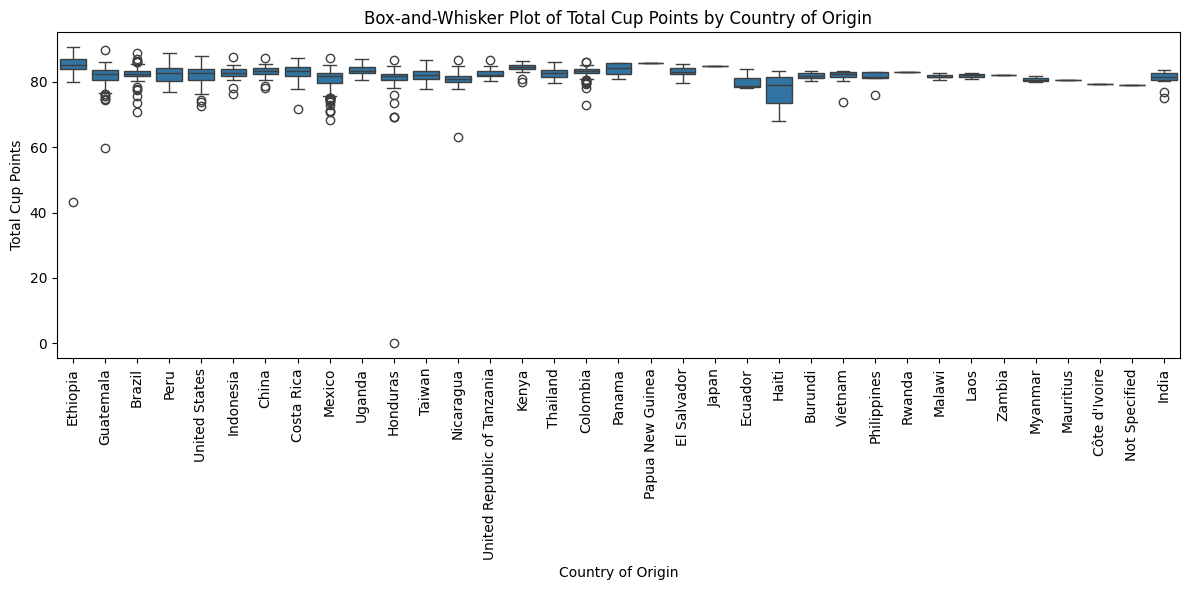

In [22]:
# Assuming cleaned_coffee_data is your DataFrame
# Step 1: Count of Coffees by Country of Origin
country_counts = cleaned_coffee_data['Country of Origin'].value_counts().reset_index()
country_counts.columns = ['Country of Origin', 'Coffee Count']

# Step 2: Calculate Mean and Median Total Cup Points
mean_median_points = cleaned_coffee_data.groupby('Country of Origin')['Total Cup Points'].agg(['mean', 'median']).reset_index()
mean_median_points.columns = ['Country of Origin', 'Mean Total Cup Points', 'Median Total Cup Points']

# Step 3: Merge the DataFrames
country_summary = pd.merge(country_counts, mean_median_points, on='Country of Origin')

# Display the summary DataFrame
print(country_summary)

# Step 4: Box-and-Whisker Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country of Origin', y='Total Cup Points', data=cleaned_coffee_data)
plt.xticks(rotation=90)
plt.title('Box-and-Whisker Plot of Total Cup Points by Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Total Cup Points')
plt.tight_layout()
plt.show()


Questions to answer:
*Which coffee variety scores the best each year?
*Which country scores the best each year?
*How do arabica coffees score against robusta coffees in each country?

C:\Users\drumm\AppData\Local\Temp\ipykernel_52800\2793299625.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=top_varieties, x='Variety', y='Top Score', palette='viridis')


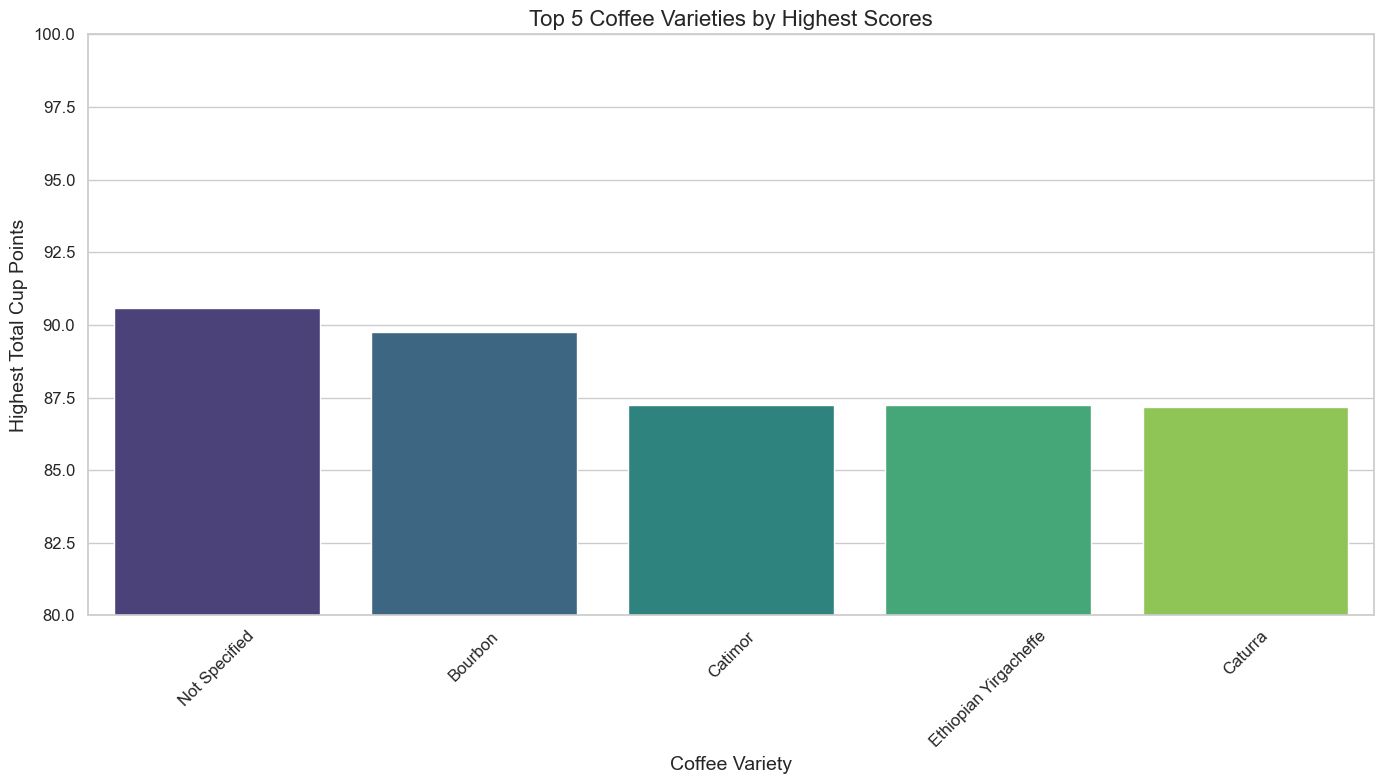

In [23]:
# Calculate maximum scores for each variety
top_scores = (
    cleaned_coffee_data.groupby('Variety')
    .agg({'Total Cup Points': 'max'})
    .reset_index()
)

# Rename the columns for easier access
top_scores.columns = ['Variety', 'Top Score']

# Sort the DataFrame from highest to lowest top score and get the top 5
top_varieties = top_scores.sort_values(by='Top Score', ascending=False).head(5)

# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Create a larger bar plot for top scores
plt.figure(figsize=(14, 8))  # Adjusted the figure size
bar_plot = sns.barplot(data=top_varieties, x='Variety', y='Top Score', palette='viridis')

# Set the y-axis limits
plt.ylim(80, 100)

plt.title('Top 5 Coffee Varieties by Highest Scores', fontsize=16)
plt.xlabel('Coffee Variety', fontsize=14)
plt.ylabel('Highest Total Cup Points', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjusts the plot to fit into the figure area.
plt.show()


In [24]:
# Which country has the highest top 5 scores, and which countries have the bottom 5 lowest scores?

# Calculate maximum scores for each country
country_scores = (
    cleaned_coffee_data.groupby('Country of Origin')
    .agg({'Total Cup Points': 'max'})
    .reset_index()
)

# Rename the columns for easier access
country_scores.columns = ['Country', 'Top Score']

# Get the top 5 countries with highest scores
top_countries = country_scores.sort_values(by='Top Score', ascending=False).head(5)

# Get the bottom 5 countries with lowest scores
bottom_countries = country_scores.sort_values(by='Top Score').head(5)

# Display the results
print("Top 5 Countries by Highest Scores:")
print(top_countries)

print("\nBottom 5 Countries by Lowest Scores:")
print(bottom_countries)


Top 5 Countries by Highest Scores:
          Country Top Score
8        Ethiopia     90.58
9       Guatemala     89.75
0          Brazil     88.83
25           Peru     88.75
32  United States     87.92

Bottom 5 Countries by Lowest Scores:
          Country Top Score
22  Not Specified     79.08
5   Côte d'Ivoire     79.33
18      Mauritius      80.5
20        Myanmar     81.83
34         Zambia     81.92


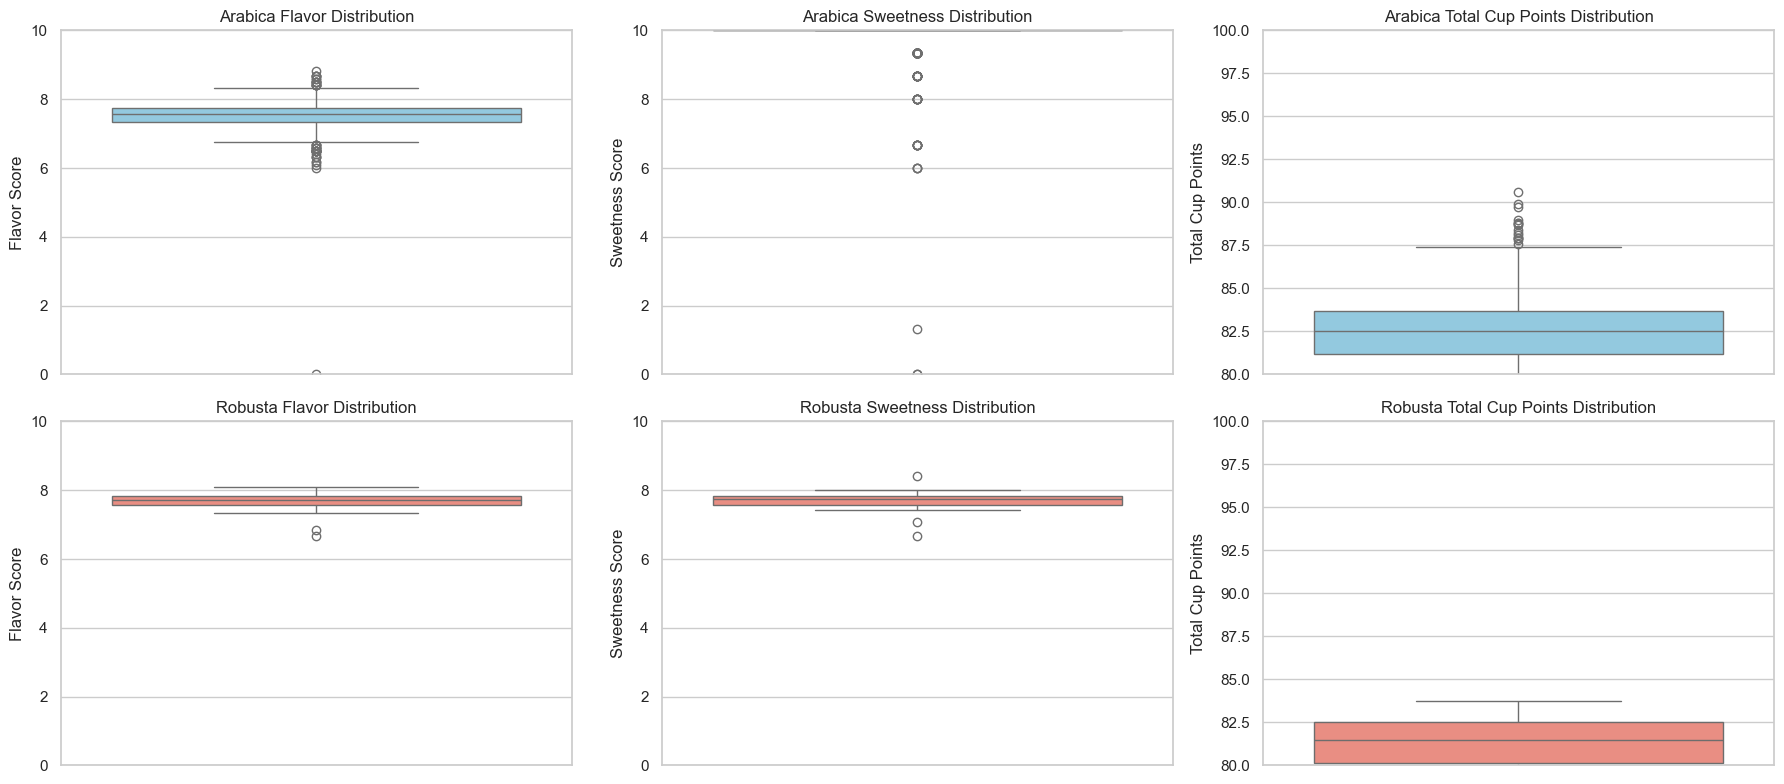

In [25]:
# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(18, 8))

# Set common y-axis limits (adjust these values based on your data range)
y_limits = (0, 10)  # Replace with appropriate min and max values for Flavor and Sweetness
cup_points_limits = (80, 100)  # Example limits for Total Cup Points

# Arabica Flavor Distribution
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, 1st subplot
sns.boxplot(data=cleaned_coffee_data[cleaned_coffee_data['Species'] == 'Arabica'], y='Flavor', color='skyblue')
plt.title('Arabica Flavor Distribution')
plt.ylabel('Flavor Score')
plt.ylim(y_limits)  # Set y-axis limits for Flavor

# Arabica Sweetness Distribution
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, 2nd subplot
sns.boxplot(data=cleaned_coffee_data[cleaned_coffee_data['Species'] == 'Arabica'], y='Sweetness', color='skyblue')
plt.title('Arabica Sweetness Distribution')
plt.ylabel('Sweetness Score')
plt.ylim(y_limits)  # Set y-axis limits for Sweetness

# Arabica Total Cup Points Distribution
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, 3rd subplot
sns.boxplot(data=cleaned_coffee_data[cleaned_coffee_data['Species'] == 'Arabica'], y='Total Cup Points', color='skyblue')
plt.title('Arabica Total Cup Points Distribution')
plt.ylabel('Total Cup Points')
plt.ylim(cup_points_limits)  # Set y-axis limits for Total Cup Points

# Robusta Flavor Distribution
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, 4th subplot
sns.boxplot(data=cleaned_coffee_data[cleaned_coffee_data['Species'] == 'Robusta'], y='Flavor', color='salmon')
plt.title('Robusta Flavor Distribution')
plt.ylabel('Flavor Score')
plt.ylim(y_limits)  # Set y-axis limits for Flavor

# Robusta Sweetness Distribution
plt.subplot(2, 3, 5)  # 2 rows, 3 columns, 5th subplot
sns.boxplot(data=cleaned_coffee_data[cleaned_coffee_data['Species'] == 'Robusta'], y='Sweetness', color='salmon')
plt.title('Robusta Sweetness Distribution')
plt.ylabel('Sweetness Score')
plt.ylim(y_limits)  # Set y-axis limits for Sweetness

# Robusta Total Cup Points Distribution
plt.subplot(2, 3, 6)  # 2 rows, 3 columns, 6th subplot
sns.boxplot(data=cleaned_coffee_data[cleaned_coffee_data['Species'] == 'Robusta'], y='Total Cup Points', color='salmon')
plt.title('Robusta Total Cup Points Distribution')
plt.ylabel('Total Cup Points')
plt.ylim(cup_points_limits)  # Set y-axis limits for Total Cup Points

plt.tight_layout()  # Adjusts the plot to fit into the figure area.
plt.show()
